<a href="https://colab.research.google.com/github/Jasmine-kaur8/Temperature_Forcast_Project/blob/main/Temperature_Forecast_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving temperature_project.csv to temperature_project.csv


Upload the file

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Imported required libraries

In [3]:
data = pd.read_csv('temperature_project.csv')
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


The target variables are:
 1. Next_Tmax 
 2. Next_Tmin
*    Both the target variable are continuous variable, thus this is a regression problem.

In [4]:
data.shape

(7752, 25)

In [5]:
data.isna().sum()


station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

There are many null values in the data.

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


All the variables are float type, except the date column

In [7]:
data.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


The gap between the 3rd quantile and the quantile is large in columns:

*   LDAPS_LH
*   LDAPS_PPT1
*   LDAPS_PPT2
*   LDAPS_PPT3
*   LDAPS_PPT4
*   DEM



In [8]:
#Feature Engineering on data

data['date']  = data['Date'].str.split('-').str[0]
data['month'] = data['Date'].str.split('-').str[1]
data['year']  = data['Date'].str.split('-').str[2]
data.drop(columns = 'Date', axis = 1, inplace = True)


data.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,date,month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,06,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,06,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,06,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,06,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,06,2013


With feature engineering converted the date column into three columns and the deleted the date column

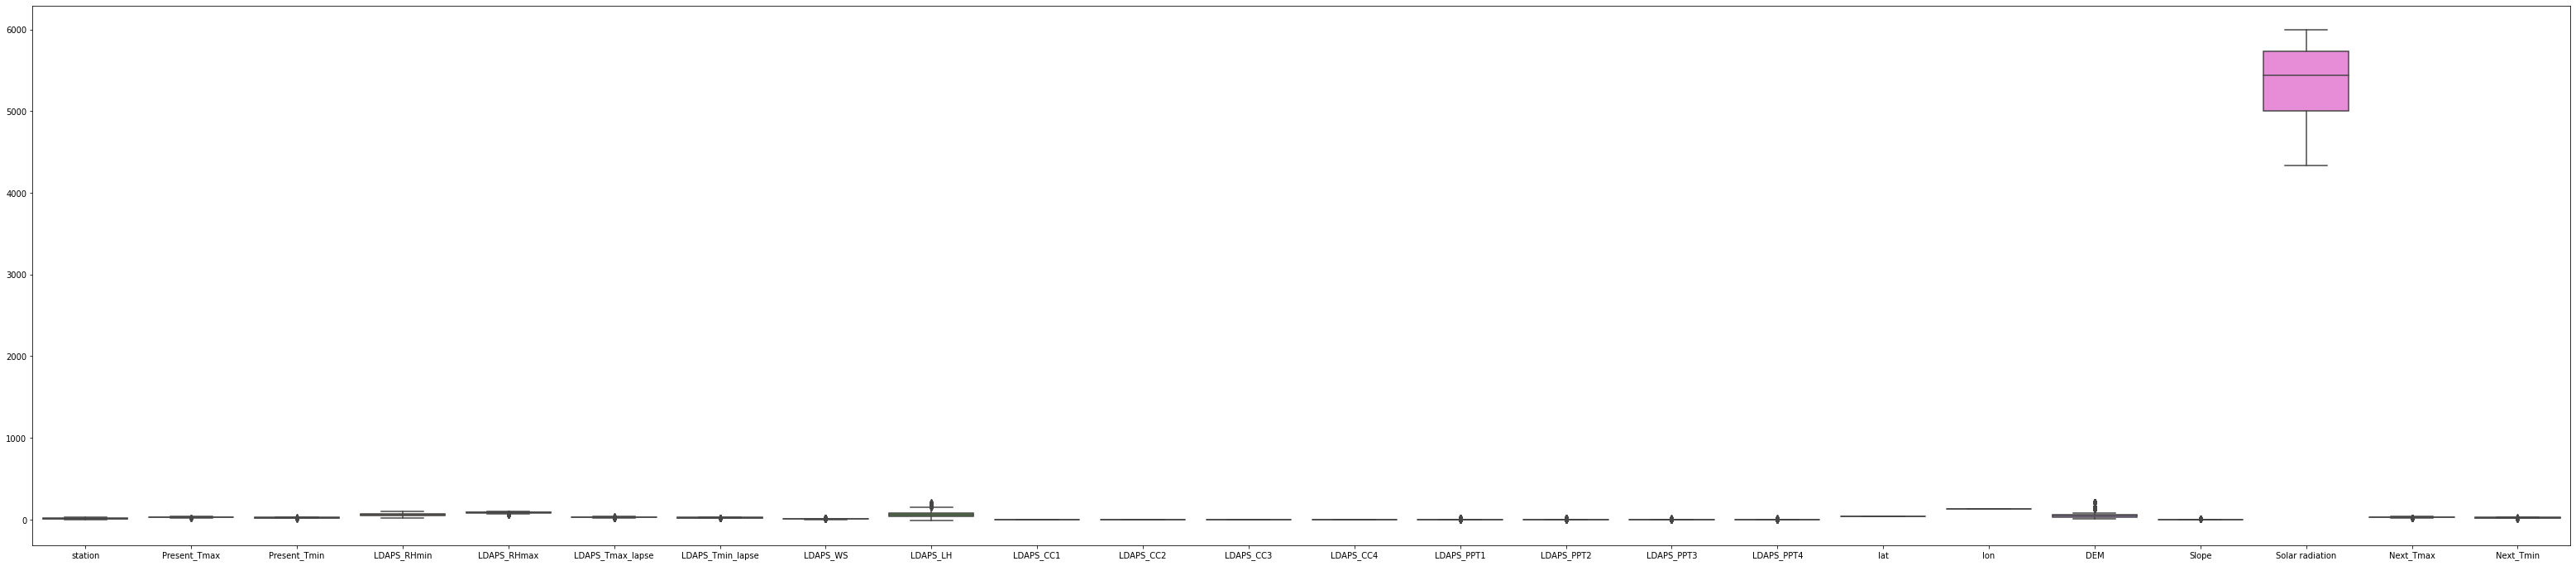

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(55, 12))
sns.boxplot(data = data, ax=ax)
plt.show()

There are somme outliers in the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84368e4cd0>,
      dtype=object)

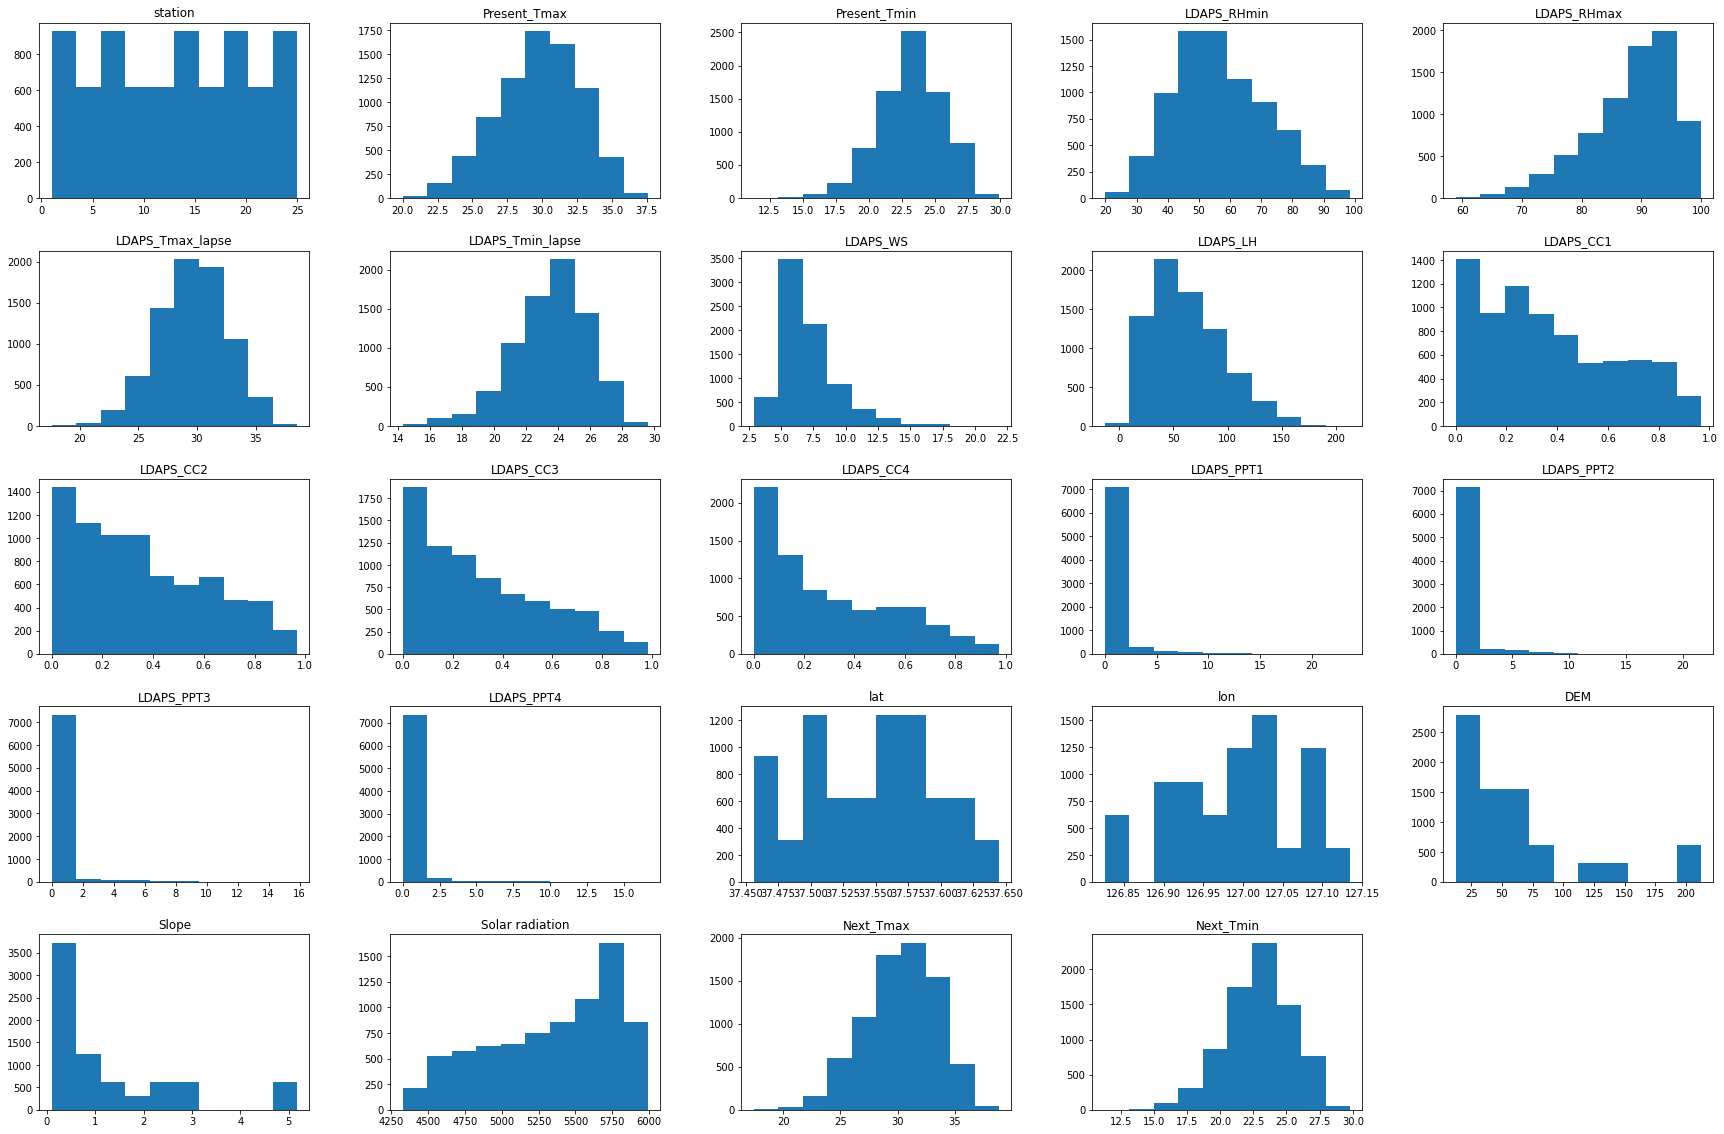

In [10]:
data.hist(figsize = (30,20), grid = False)

There is high skewness in the following columns:

*   LDAPS_RHmax
*   LDAPS_WS
*   LDAPS_LH
*   LDAPS_CC3          
*   LDAPS_CC4      
*   LDAPS_PPT1       
*   LDAPS_PPT2         
*   LDAPS_PPT3     
*   LDAPS_PPT4 



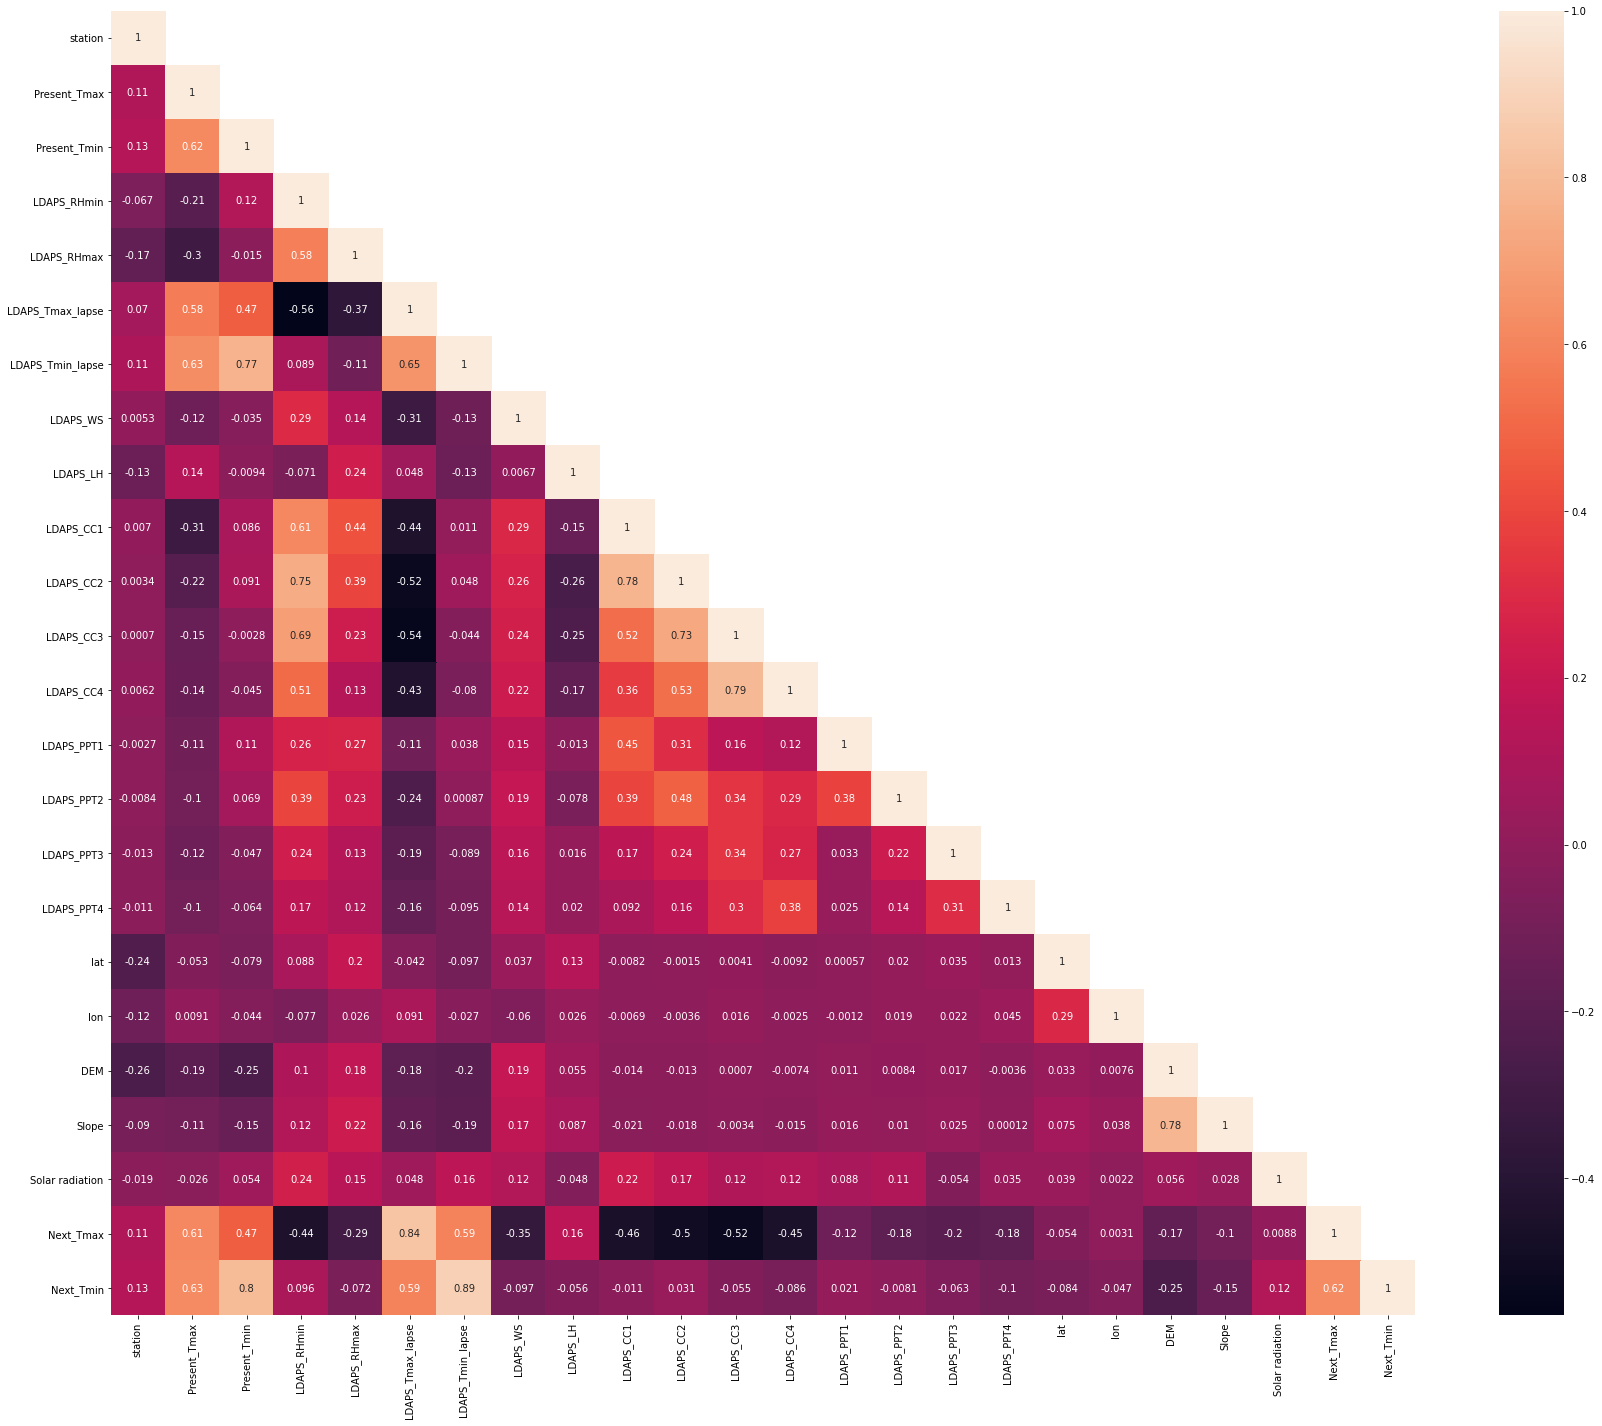

In [11]:
#Correlation Matrix

corr_mat = data.corr()
m = np.array(corr_mat)
m[np.tril_indices_from(m)] = False

fig = plt.gcf()
fig.set_size_inches(30,24)
sns.heatmap(data = corr_mat, mask = m, square = True, annot = True, cbar = True)

In [12]:
data.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'date', 'month', 'year'],
      dtype='object')

The target variable Next_Tmin is highly related to:


*   Present_Tmax
*   Present_Tmin
*   LDAPS_Tmax_lapse
*   LDAPS_Tmin_lapse
*   Next_Tmax

The target variable Next_Tmax is highly related to:


*   Present_Tmax
*   Present_Tmin
*   LDAPS_Tmax_lapse
*   LDAPS_Tmin_lapse
*   Next_Tmin


Features that are likely to be correlated with each other:


1.   LDAPS_RHmin and LDAPS_CC1
2.   LDAPS_RHmin and LDAPS_CC2
3.   LDAPS_RHmin and LDAPS_CC3
4.   LDAPS_RHmin and LDAPS_CC4
5.   DEM and slope

Also, all the LDAPS_CC are likely to be correled with all the other LDAPS_CC 







UFuncTypeError: ignored

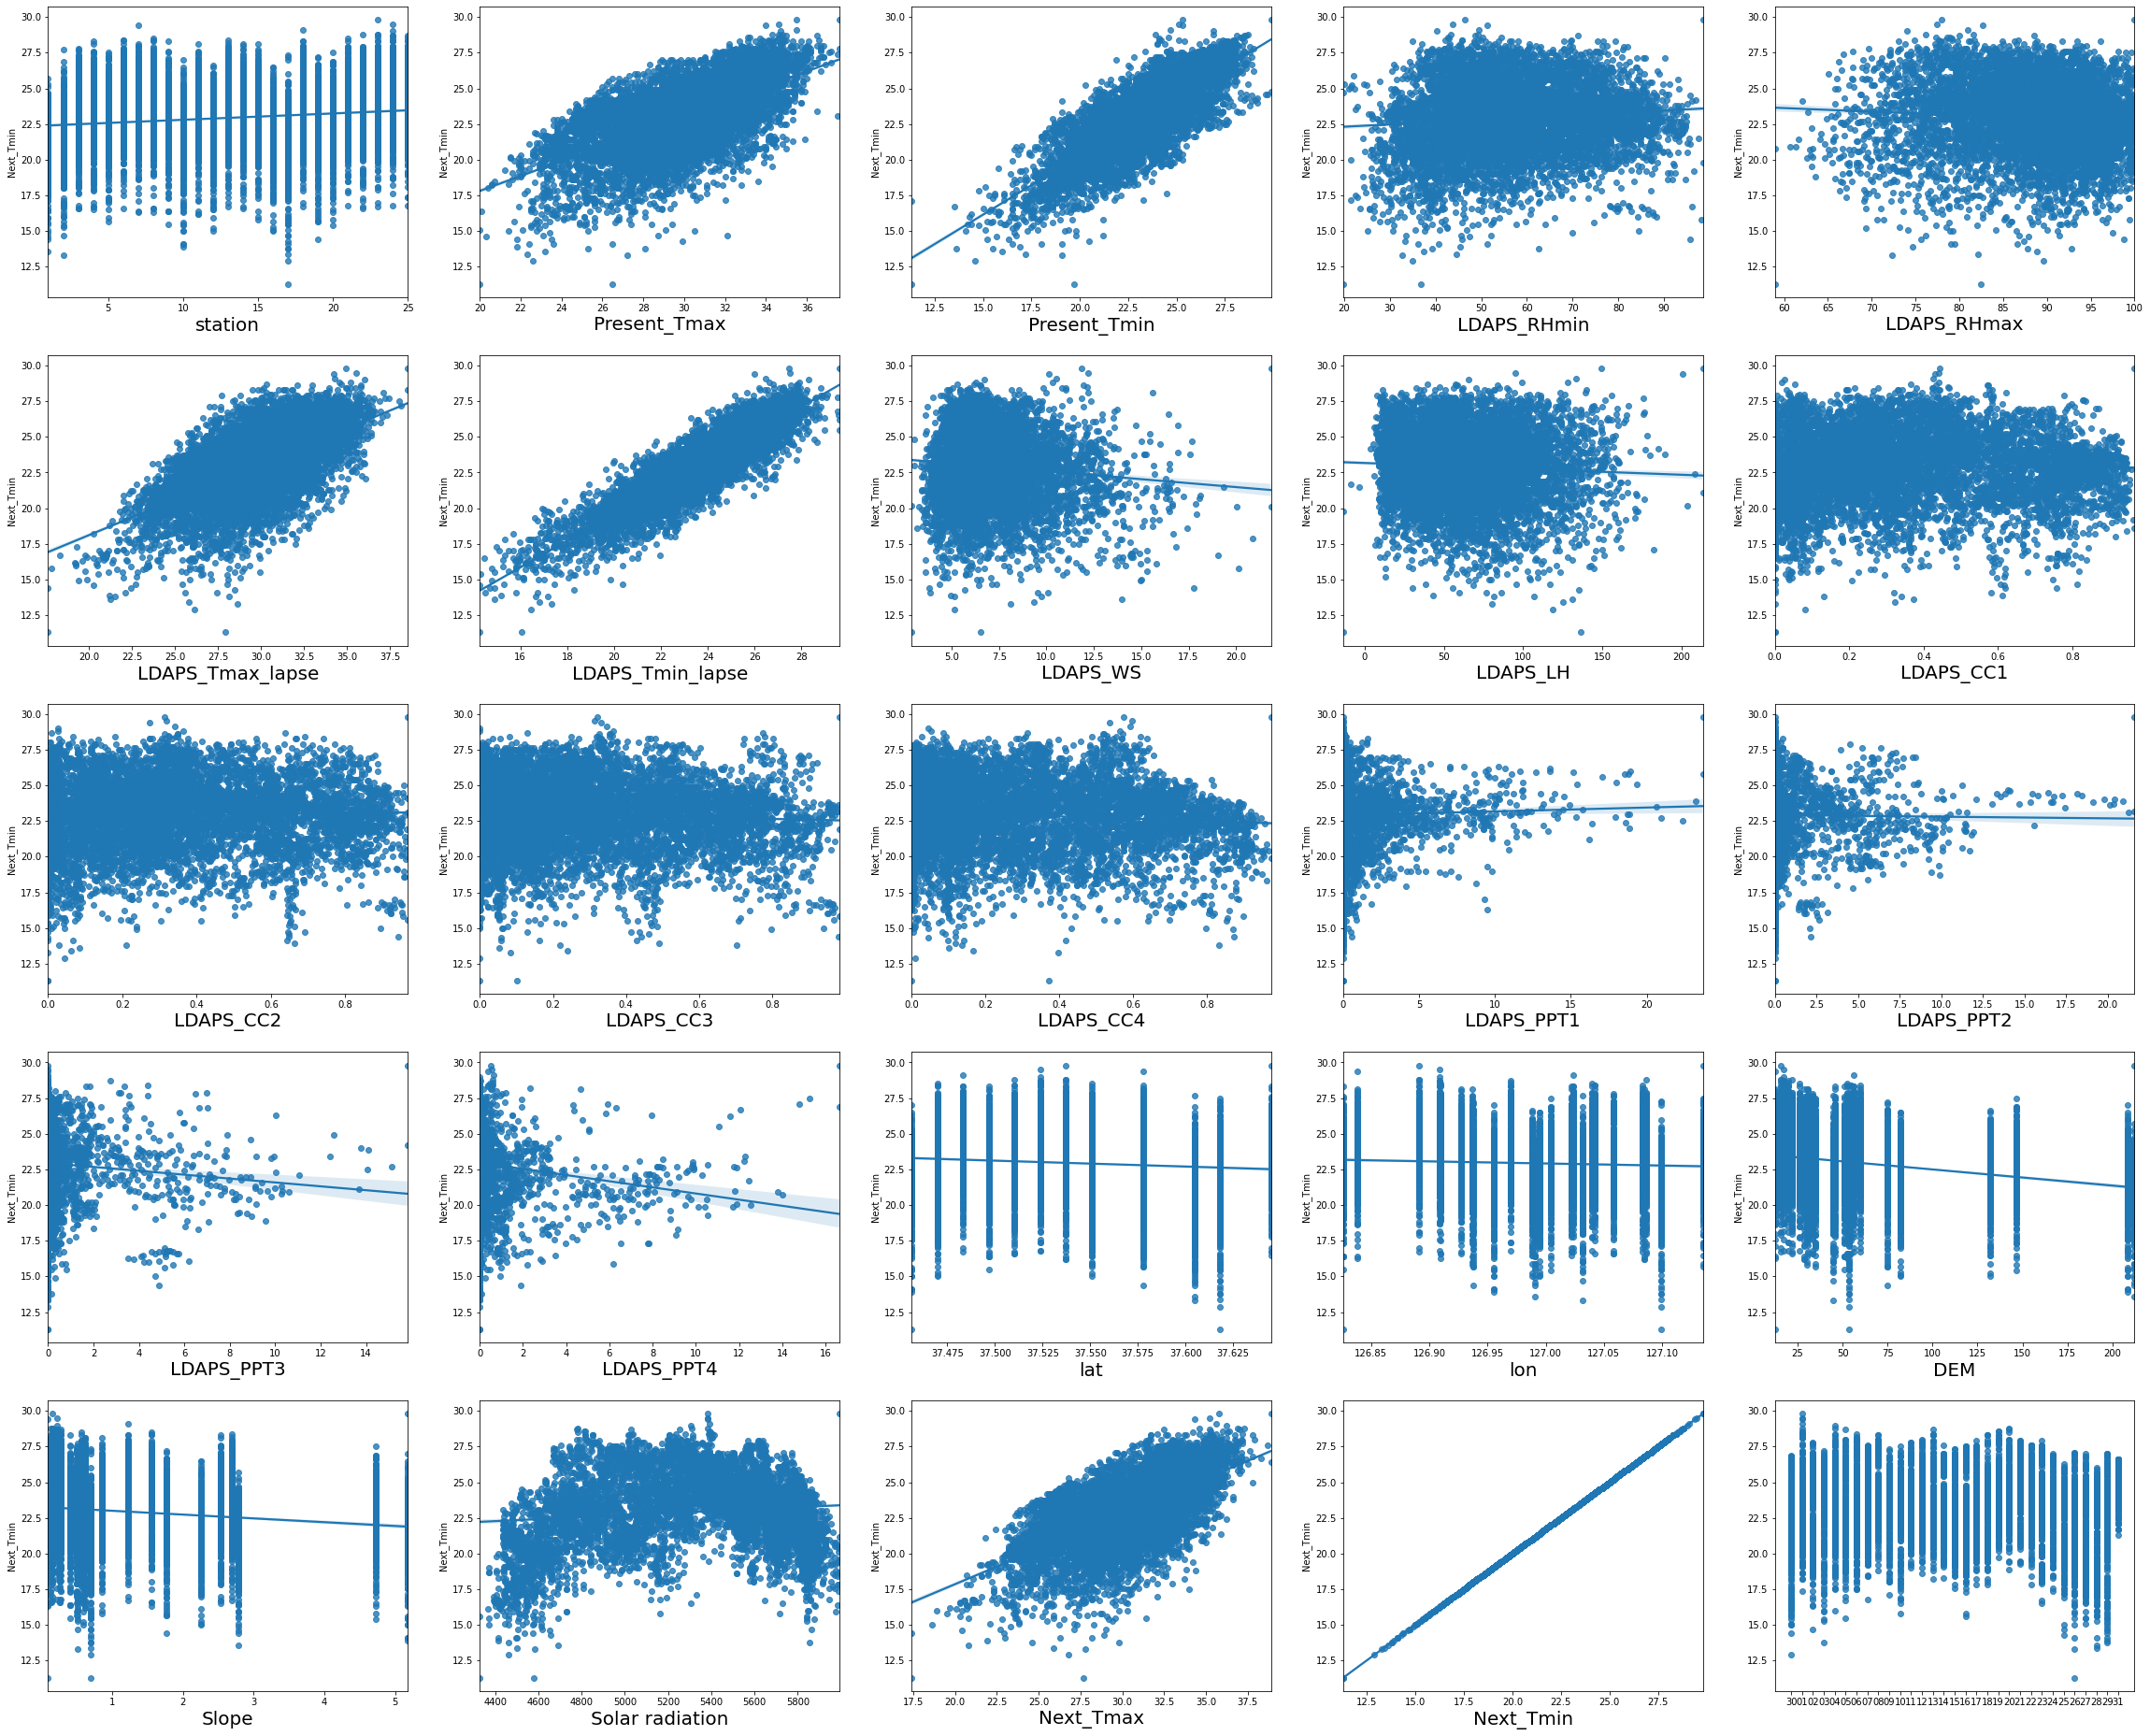

In [13]:
plt.figure(figsize = (40,40))
graph = 1

for column in data:
  if graph<=30:
    ax = plt.subplot(6,5,graph)
    sns.regplot(x = data[column], y = 'Next_Tmin', data = data)
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

Some columns are highly correlated with the target variable while some are not.

UFuncTypeError: ignored

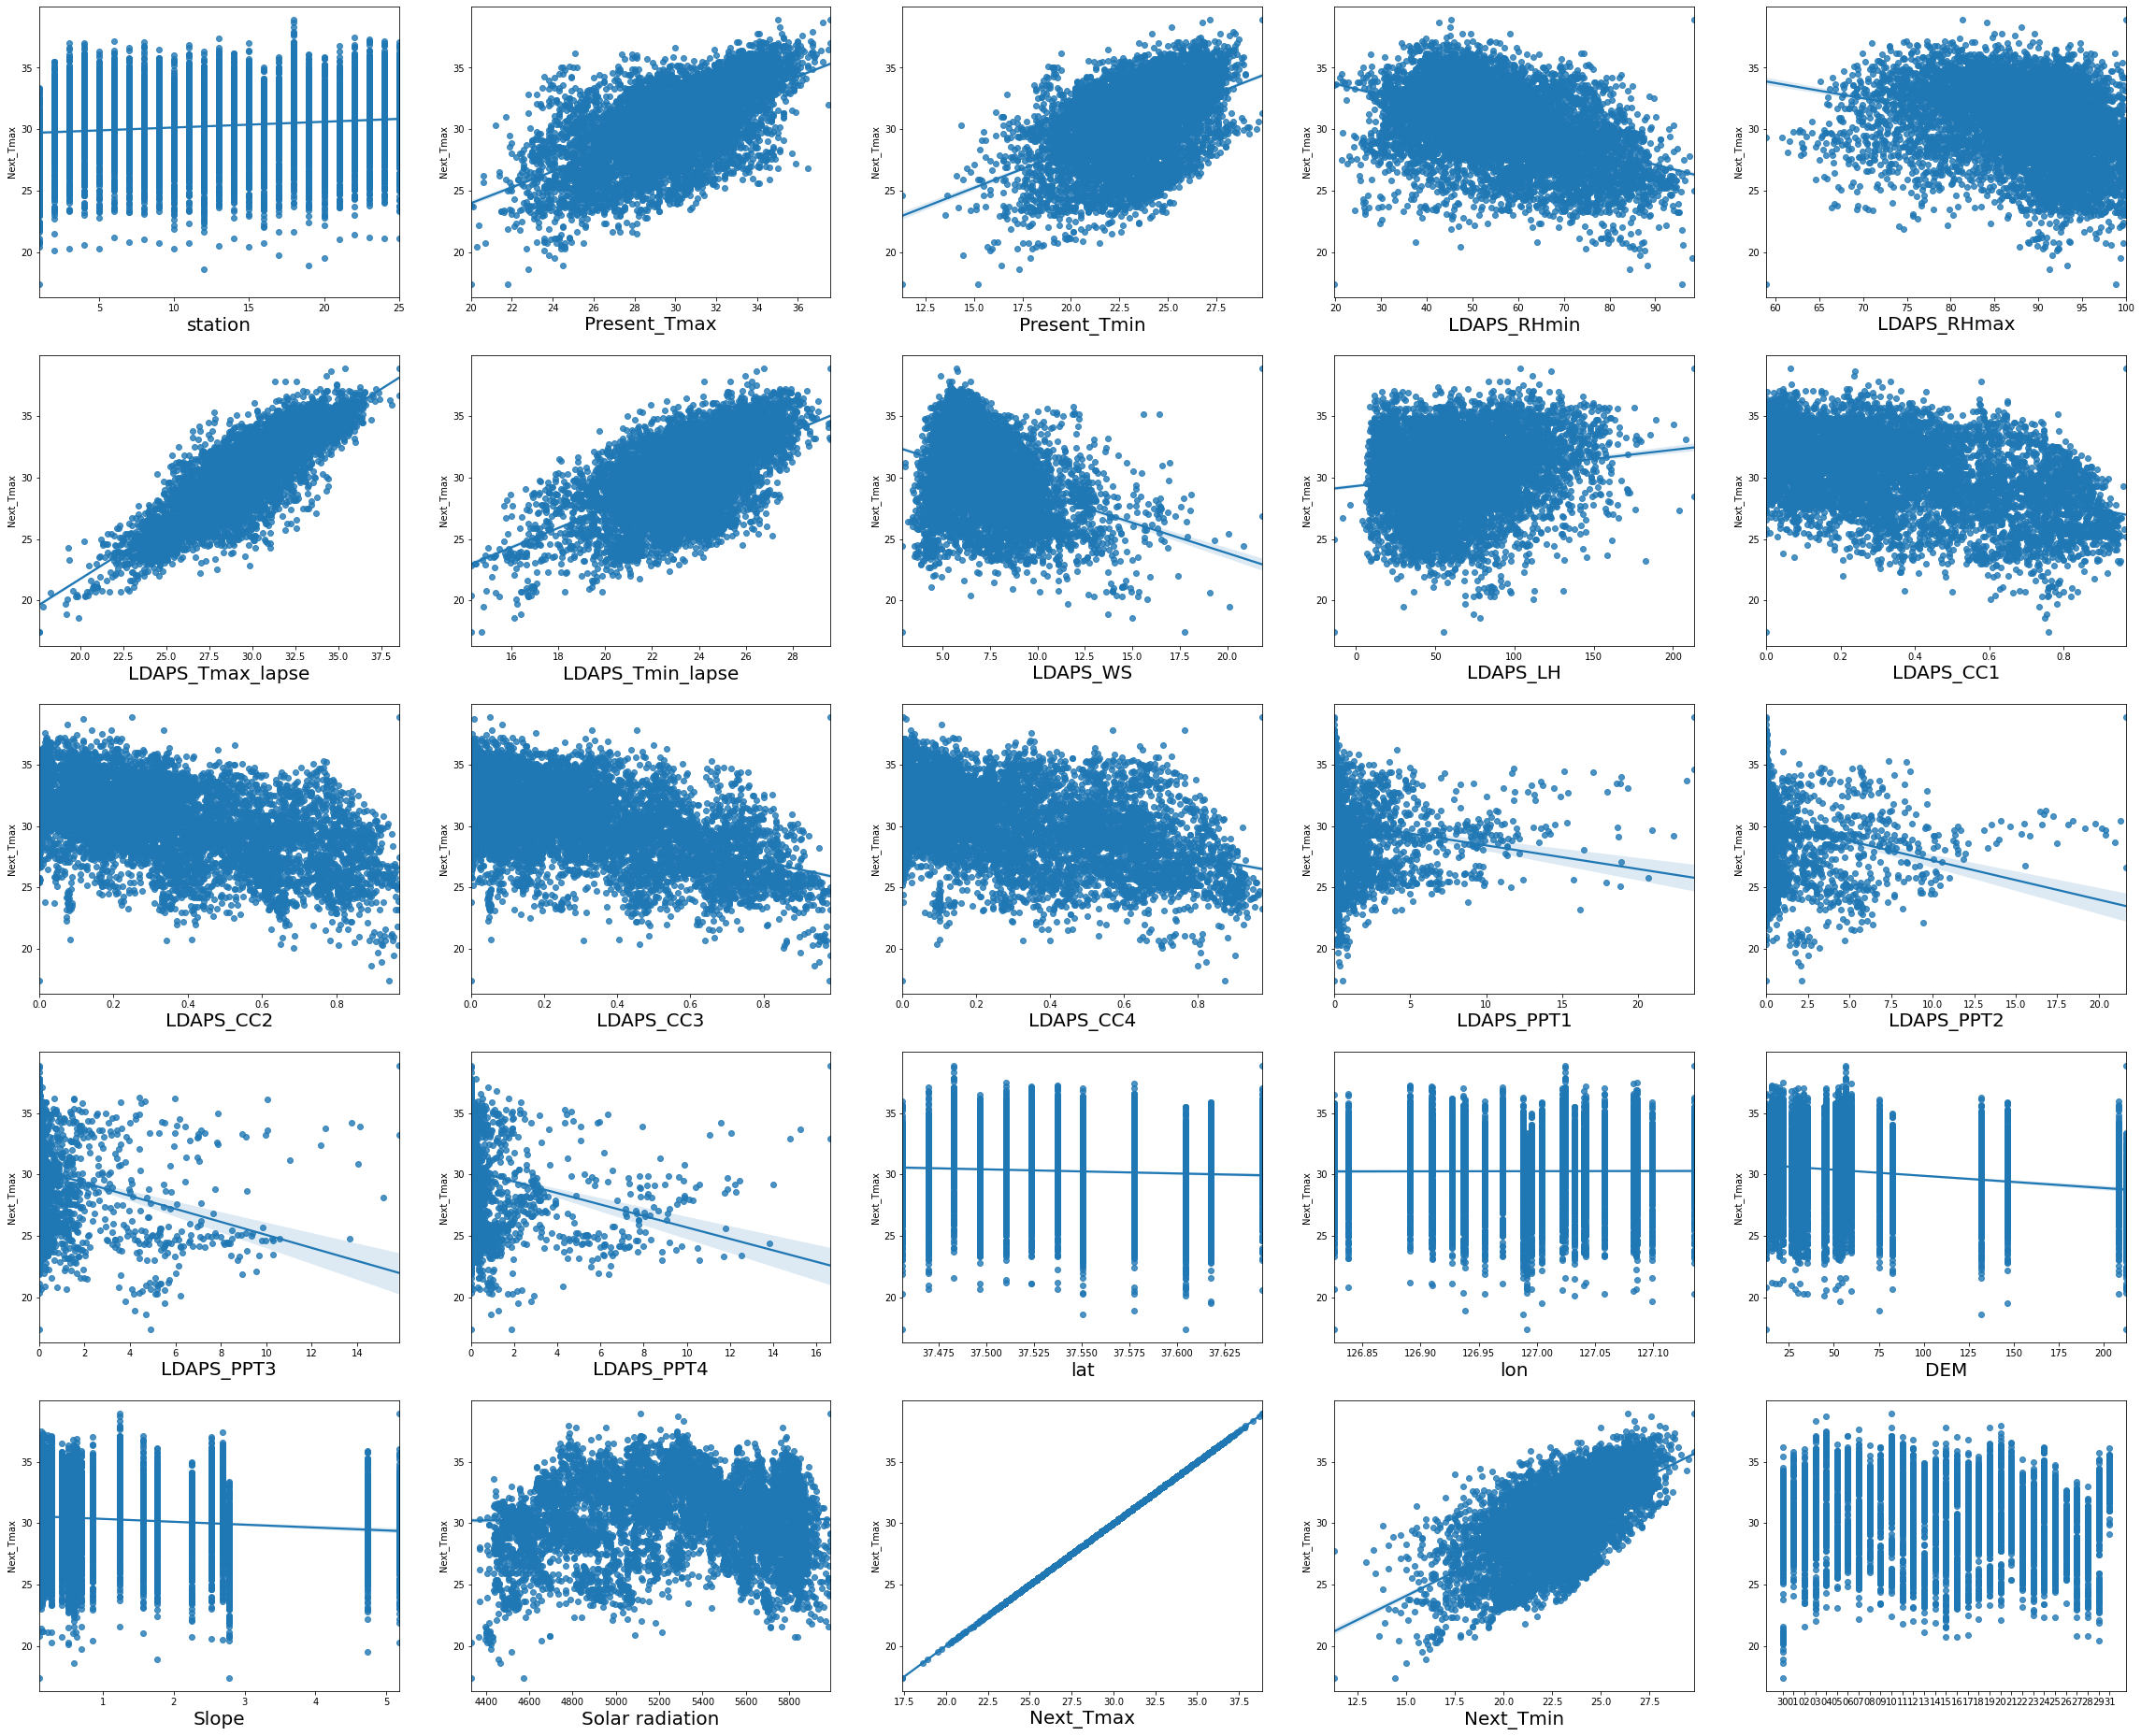

In [14]:
plt.figure(figsize = (40,40))
graph = 1

for column in data:
  if graph<=30:
    ax = plt.subplot(6,5,graph)
    sns.regplot(x = data[column], y = 'Next_Tmax', data = data)
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

Some columns are highly correlated with the target variable while some are not.

In [15]:
#Dealing with the missing values

from sklearn.impute import KNNImputer

knn_ipm = KNNImputer(n_neighbors = 5)
data1 = knn_ipm.fit_transform(data[['station','Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','Next_Tmax','Next_Tmin','date','month','year']])
data1


array([[1.000e+00, 2.870e+01, 2.140e+01, ..., 3.000e+01, 6.000e+00,
        2.013e+03],
       [2.000e+00, 3.190e+01, 2.160e+01, ..., 3.000e+01, 6.000e+00,
        2.013e+03],
       [3.000e+00, 3.160e+01, 2.330e+01, ..., 3.000e+01, 6.000e+00,
        2.013e+03],
       ...,
       [2.500e+01, 2.320e+01, 1.740e+01, ..., 3.000e+01, 8.000e+00,
        2.017e+03],
       [1.900e+01, 2.000e+01, 1.130e+01, ..., 2.940e+01, 8.000e+00,
        2.017e+03],
       [1.960e+01, 3.760e+01, 2.990e+01, ..., 2.000e+01, 8.000e+00,
        2.016e+03]])

Used knn impputer to deal with the missing values

In [16]:
data2 = pd.DataFrame(data1)
data2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,29.1,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,30.5,22.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,31.1,23.9,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,31.7,24.3,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,31.2,22.5,30.0,6.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.3,18.1,30.0,8.0,2017.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.6,18.8,30.0,8.0,2017.0
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,27.8,17.4,30.0,8.0,2017.0
7750,19.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.4,11.3,29.4,8.0,2017.0


Converted the result into a dataframe

In [17]:
data2.isna().sum().any()

False

There is no null value

In [18]:
data['station'] = data2[0]
data['Present_Tmax'] = data2[1]
data['Present_Tmin'] = data2[2]
data['LDAPS_RHmin'] = data2[3]
data['LDAPS_RHmax'] = data2[4]
data['LDAPS_Tmax_lapse'] = data2[5]
data['LDAPS_Tmin_lapse'] = data2[6]
data['LDAPS_WS'] = data2[7]
data['LDAPS_LH'] = data2[8]
data['LDAPS_CC1'] = data2[9]
data['LDAPS_CC2'] = data2[10]
data['LDAPS_CC3'] = data2[11]
data['LDAPS_CC4'] = data2[12]
data['LDAPS_PPT1'] = data2[13]
data['LDAPS_PPT2'] = data2[14]
data['LDAPS_PPT3'] = data2[15]
data['LDAPS_PPT4'] = data2[16]
data['Next_Tmax'] = data2[17]
data['Next_Tmin'] = data2[18]
data['date'] = data2[19]
data['month'] = data2[10]
data['year'] = data2[21]
data.isna().sum().any()

False

Substituted the imputed values in the initial dataframe and thus there is no value.

In [19]:
data['date'] = data['date'].astype(int)
data['month'] = data['month'].astype(int)
data['year'] = data['year'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Present_Tmax      7752 non-null   float64
 2   Present_Tmin      7752 non-null   float64
 3   LDAPS_RHmin       7752 non-null   float64
 4   LDAPS_RHmax       7752 non-null   float64
 5   LDAPS_Tmax_lapse  7752 non-null   float64
 6   LDAPS_Tmin_lapse  7752 non-null   float64
 7   LDAPS_WS          7752 non-null   float64
 8   LDAPS_LH          7752 non-null   float64
 9   LDAPS_CC1         7752 non-null   float64
 10  LDAPS_CC2         7752 non-null   float64
 11  LDAPS_CC3         7752 non-null   float64
 12  LDAPS_CC4         7752 non-null   float64
 13  LDAPS_PPT1        7752 non-null   float64
 14  LDAPS_PPT2        7752 non-null   float64
 15  LDAPS_PPT3        7752 non-null   float64
 16  LDAPS_PPT4        7752 non-null   float64


Converted the datatype of date, month and year to integer type 

In [20]:
#Treating the outliers (data)

# findingout the quantile of data 

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD
data_new = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("shape before and after")
print("shape before".ljust(20),":", data.shape)
print("shape after".ljust(20),":", data_new.shape)
print("Percentage Loss".ljust(20),":", (data.shape[0]-data_new.shape[0])/data.shape[0])

shape before and after
shape before         : (7752, 27)
shape after          : (3235, 27)
Percentage Loss      : 0.582688338493292


58% of the data is lost using IQR, thus this cannot be used

In [21]:
scaler = StandardScaler()
X = data.drop(columns = ['Next_Tmax',	'Next_Tmin'])
X_scaled = scaler.fit_transform(X)

Transformed the data using standard scaler

In [22]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_scaled)

array([[-1.44362403e-02,  2.63935860e+00, -2.49601924e+00, ...,
         1.07221230e-01,  2.03776318e-01,  0.00000000e+00],
       [-1.05180134e+00,  5.67457625e-01, -5.95633418e-01, ...,
         4.93272231e-03,  2.36666516e-01, -0.00000000e+00],
       [-1.33718413e+00, -1.68677049e-01,  9.25773644e-02, ...,
         5.37880289e-02,  2.74193490e-01,  0.00000000e+00],
       ...,
       [-2.20874146e+00,  3.65454525e+00,  4.18970623e+00, ...,
        -1.23438427e-01,  2.31477412e-01,  0.00000000e+00],
       [-1.65979116e+00,  6.65825789e+00,  7.37334711e+00, ...,
        -2.76450184e-01,  1.29890183e+00, -0.00000000e+00],
       [ 1.31245675e+01, -6.78313012e+00, -6.10672214e+00, ...,
         1.09183818e-01, -5.16216965e-01,  0.00000000e+00]])

Applied PCA

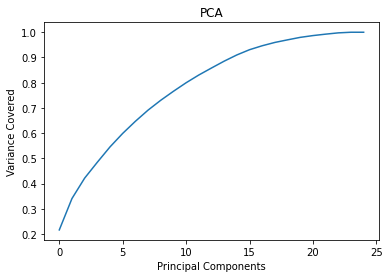

In [23]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

The graph of PCA shows that around 95% of the information is stored by using only 19 features

In [24]:
pca = PCA(n_components = 19)
new_pcomp = pca.fit_transform(X_scaled)
df = pd.DataFrame(new_pcomp, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19',])
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-0.014436,2.639359,-2.496019,-0.203222,0.226766,0.082862,-0.976970,0.359614,-1.151623,0.971684,0.338852,-0.171814,0.789751,0.571534,-1.181131,1.477748,0.344165,0.508172,0.409366
1,-1.051801,0.567458,-0.595633,-0.547010,-1.645326,-0.455215,-0.867232,0.400385,-1.329829,0.879501,0.416736,-0.192735,0.562621,0.453112,-1.153111,1.288293,0.005847,1.049225,0.096248
2,-1.337184,-0.168677,0.092577,-0.499245,-1.100458,-0.542939,-1.467894,1.066634,-1.228749,0.922132,0.650746,-0.175224,0.645613,0.045034,-1.160298,1.153085,-0.108907,1.115208,-0.261337
3,-0.667331,0.827357,-1.784658,-0.332796,-1.682215,0.145925,-0.739549,0.101566,-1.547840,0.274919,-0.189780,-0.114144,0.765411,1.122772,-0.904987,1.207258,-0.136597,1.037530,-0.777204
4,-1.038077,0.747589,-0.626779,-0.286813,-2.057857,-0.210437,-0.142711,0.295189,-0.907892,0.226756,-0.239016,-0.876734,-0.651678,-0.649500,-1.729056,1.548806,-0.157797,0.961622,0.289934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,-2.095115,3.954839,3.800693,-1.230579,-0.050066,0.555069,0.797020,-0.595621,1.515846,-0.733810,0.222302,0.578738,0.687042,0.657366,0.109667,-0.506055,0.152475,-0.281898,0.534169
7748,-2.235279,3.706395,4.021664,-1.252848,0.333185,0.499009,0.397301,-0.095787,1.591841,-0.724584,0.213611,0.631710,0.852010,0.445436,0.126127,-0.656116,-0.031975,-0.269647,0.284095
7749,-2.208741,3.654545,4.189706,-1.208805,0.450118,0.193969,-0.383756,0.755343,1.654181,-0.894683,0.097888,0.739328,1.133968,0.147847,0.134006,-0.888123,-0.485296,-0.204922,0.197390
7750,-1.659791,6.658258,7.373347,-1.901435,1.894386,-0.918109,-0.518183,-0.321402,2.404337,0.961190,0.724145,0.715390,-0.099686,1.031111,0.508689,-0.659357,0.868610,1.563205,0.273528


Converted these features into principal components.

# Next_Tmin Predictive Model

In [25]:
#Model Building for Next_Tmin

X1 = df
Y1 = data['Next_Tmin']

Spliting the data

In [26]:

X_train, X_test, y_train, y_test = train_test_split(
    X1, Y1, test_size=0.20, random_state=30)


models = [LinearRegression(), RandomForestRegressor(),
          KNeighborsRegressor(n_neighbors = 4), GradientBoostingRegressor()]
model_names = ['LR','RF', 'KNN','GB']

r2 = []
mse = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    r2.append(r2_score(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    

models = {'Modelling Algorithm': model_names, 'r2 score': r2, 'MSE' : mse}
models_df = pd.DataFrame(models)
models_df

,Modelling Algorithm,r2 score,MSE
0,LR,0.814153,1.092700
1,RF,0.875070,0.734536
2,KNN,0.867665,0.778071
3,GB,0.843564,0.919774


Trained the model and received r2 score and mse.

In [27]:
#cross validation 

from sklearn.model_selection import KFold, cross_val_score,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    X1, Y1, test_size=0.20, random_state=30)

models = [LinearRegression(), RandomForestRegressor(),
          KNeighborsRegressor(n_neighbors = 4), GradientBoostingRegressor()]
model_names = ['LR','RF', 'KNN','GB']


k_f = KFold(n_splits = 4, shuffle = True)
k_f

CV_S = []

for model in range(len(models)):
    clf = models[model]
    c = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    CV_S.append(cross_val_score(c, X1, Y1, cv = 5).mean())
    

CV = {'Modelling Algorithm': model_names, 'CV SCORE': CV_S}
CV_df = pd.DataFrame(CV)
CV_df

,Modelling Algorithm,CV SCORE
0,LR,0.761675
1,RF,0.714517
2,KNN,0.570461
3,GB,0.732643


Applied cross validation.

In [28]:
#Comparing CV Score and the r2 score:

Comparison = pd.DataFrame({})
Comparison['Modelling Algorithm'] =  model_names
Comparison['r2 score'] = r2
Comparison['CV SCORE'] = CV_S
Comparison['Difference'] = [r2[0] - CV_S[0], r2[1] - CV_S[1], r2[2] - CV_S[2], r2[3] - CV_S[3]]
Comparison

,Modelling Algorithm,r2 score,CV SCORE,Difference
0,LR,0.814153,0.761675,0.052478
1,RF,0.875070,0.714517,0.160553
2,KNN,0.867665,0.570461,0.297204
3,GB,0.843564,0.732643,0.110921


The difference is minimum for the linear regression

In [32]:
#HYPERPARAMETER TUNING:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'fit_intercept' : ['True','False'],
    'normalize' : ['True','False'],
    'copy_X' : ['True','False'],
    'n_jobs' : range(-1,3),
}

applied hyperparameter tuning

In [34]:
grid = GridSearchCV(LinearRegression(), param_grid = grid_param)

applied grid search CV

In [35]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'n_jobs': range(-1, 3),
                         'normalize': ['True', 'False']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Trained the model

In [36]:
best_parameters = grid.best_params_
print(best_parameters)

{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': -1, 'normalize': 'True'}


Got the best parameters

In [37]:
#FINAL MODEL FOR Next_Tmin
#Substituting the best parameters:

lr1 =  LinearRegression(copy_X = 'True', fit_intercept = 'True', n_jobs = -1, normalize = 'True')

lr1.fit(X_train, y_train)
pred = lr1.predict(X_test)
rscore = r2_score(y_test, pred)
rscore

0.8141530896383602

The r2 score after the hyperparameter tuning is 81.41%

In [38]:
#SAVING THE MODEL:

import joblib
joblib.dump(lr1, 'Next_Tmin_final_model.pkl')

['Next_Tmin_final_model.pkl']

Saved the Next_Tmin model

#Next_Tmax Prdictive Model

In [39]:
#Model Building for Next_Tmax

X2 = df
Y2 = data['Next_Tmax']

Spliting the variables

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X2, Y2, test_size=0.20, random_state=25)


models = [LinearRegression(), RandomForestRegressor(),
          KNeighborsRegressor(n_neighbors = 4), GradientBoostingRegressor()]
model_names = ['LR','RF', 'KNN','GB']

R2 = []
mse = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    R2.append(r2_score(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    

models = {'Modelling Algorithm': model_names, 'r2 score': R2, 'MSE' : mse}
models_df2 = pd.DataFrame(models)
models_df2

,Modelling Algorithm,r2 score,MSE
0,LR,0.763633,2.275638
1,RF,0.855089,1.395134
2,KNN,0.853171,1.413599
3,GB,0.801299,1.913000


Trained the data and received the r2 score and mse

In [43]:
#cross validation 

from sklearn.model_selection import KFold, cross_val_score,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    X2, Y2, test_size=0.20, random_state=25)

models = [LinearRegression(), RandomForestRegressor(),
          KNeighborsRegressor(n_neighbors = 4), GradientBoostingRegressor()]
model_names = ['LR','RF', 'KNN','GB']


k_f = KFold(n_splits = 4, shuffle = True)
k_f

CV_S2 = []

for model in range(len(models)):
    clf = models[model]
    c = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    CV_S2.append(cross_val_score(c, X2, Y2, cv = 5).mean())
    

CV = {'Modelling Algorithm': model_names, 'CV SCORE': CV_S2}
CV_df2 = pd.DataFrame(CV)
CV_df2

,Modelling Algorithm,CV SCORE
0,LR,0.674485
1,RF,0.636207
2,KNN,0.524227
3,GB,0.655646


Applied cross validation

In [44]:
#Comparing CV Score and the r2 score:

Comparison2 = pd.DataFrame({})
Comparison2['Modelling Algorithm'] =  model_names
Comparison2['r2 score'] = R2
Comparison2['CV SCORE'] = CV_S2
Comparison2['Difference'] = [R2[0] - CV_S2[0], R2[1] - CV_S2[1], R2[2] - CV_S2[2], R2[3] - CV_S2[3]]
Comparison2

,Modelling Algorithm,r2 score,CV SCORE,Difference
0,LR,0.763633,0.674485,0.089148
1,RF,0.855089,0.636207,0.218882
2,KNN,0.853171,0.524227,0.328944
3,GB,0.801299,0.655646,0.145653


The difference is minimum for the linear regression

In [45]:
#HYPERPARAMETER TUNING:

grid_param = {
    'fit_intercept' : ['True','False'],
    'normalize' : ['True','False'],
    'copy_X' : ['True','False'],
    'n_jobs' : range(-1,3),
}

applied hyperparameter tuning

In [46]:
grid = GridSearchCV(LinearRegression(), param_grid = grid_param)

applied grid search cv

In [47]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'n_jobs': range(-1, 3),
                         'normalize': ['True', 'False']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

trained the model

In [48]:
best_parameters = grid.best_params_
print(best_parameters)

{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': -1, 'normalize': 'True'}


got the best parameters

In [51]:
#FINAL MODEL FOR Next_Tmin
#Substituting the best parameters:

lr2 =  LinearRegression(copy_X = 'True', fit_intercept = 'True', n_jobs = -1, normalize = 'True')

lr2.fit(X_train, y_train)
pred = lr2.predict(X_test)
Rscore = r2_score(y_test, pred)
Rscore

0.7636325233566874

Received 76.36% r score after hyperparameter tuning

In [52]:
#SAVING THE MODEL:

import joblib
joblib.dump(lr2, 'Next_Tmin_final_model.pkl')

['Next_Tmin_final_model.pkl']

Saved the Next_Tmax model